1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.


In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [42]:
mypath = "bank_marketing.csv"
data = pd.read_csv(mypath)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,blue-collar,married,secondary,no,314,yes,yes,unknown,16,may,269,2,-1,0,unknown,no
8996,32,blue-collar,married,secondary,no,491,yes,no,unknown,8,may,223,2,-1,0,unknown,no
8997,44,services,single,secondary,no,2886,no,no,unknown,20,jun,31,1,-1,0,unknown,no
8998,57,services,married,primary,no,491,yes,no,cellular,15,apr,1217,3,-1,0,unknown,yes


5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.



In [43]:
def hotenc(attr):
  he = OneHotEncoder(dtype=np.int64)
  rshd = data[attr].to_numpy().reshape(-1,1)
  he.fit(rshd)
  rshd = he.transform(rshd).toarray()
  values = data[attr].unique()
  nvalues = len(values)
  i = 0
  for v in values:
    data[attr + v] = rshd[:, i]
    i += 1
  return

le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
hotenc('default')
data.drop('default', axis=1, inplace=True)
data.drop('defaultno', axis=1, inplace=True)
hotenc('housing')
data.drop('housing', axis=1, inplace=True)
data.drop('housingno', axis=1, inplace=True)
hotenc('loan')
data.drop('loan', axis=1, inplace=True)
data.drop('loanno', axis=1, inplace=True)
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])
hotenc('y')
data.drop('y', axis=1, inplace=True)
data.drop('yno', axis=1, inplace=True)

data.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,defaultyes,housingyes,loanyes,yyes
0,31,6,1,2,2666,0,10,9,318,2,97,6,2,0,0,0,0
1,29,10,2,3,1584,0,6,11,245,1,-1,0,3,0,0,0,0
2,41,1,1,1,2152,0,17,9,369,1,-1,0,3,0,1,0,1
3,50,1,1,1,84,0,17,5,18,8,-1,0,3,0,1,0,1
4,40,0,1,1,0,0,28,5,496,2,182,11,2,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         9000 non-null   int64
 1   job         9000 non-null   int64
 2   marital     9000 non-null   int64
 3   education   9000 non-null   int64
 4   balance     9000 non-null   int64
 5   contact     9000 non-null   int64
 6   day         9000 non-null   int64
 7   month       9000 non-null   int64
 8   duration    9000 non-null   int64
 9   campaign    9000 non-null   int64
 10  pdays       9000 non-null   int64
 11  previous    9000 non-null   int64
 12  poutcome    9000 non-null   int64
 13  defaultyes  9000 non-null   int64
 14  housingyes  9000 non-null   int64
 15  loanyes     9000 non-null   int64
 16  yyes        9000 non-null   int64
dtypes: int64(17)
memory usage: 1.2 MB


6.a Justifica el uso de LabelEncoder o OneHotEcoder.

**OneHotEncoder para aquellos atributos categoricos cuyos valores son mas de dos opciones, y si son unicamente dos opciones entonces LabelEncoder**

7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

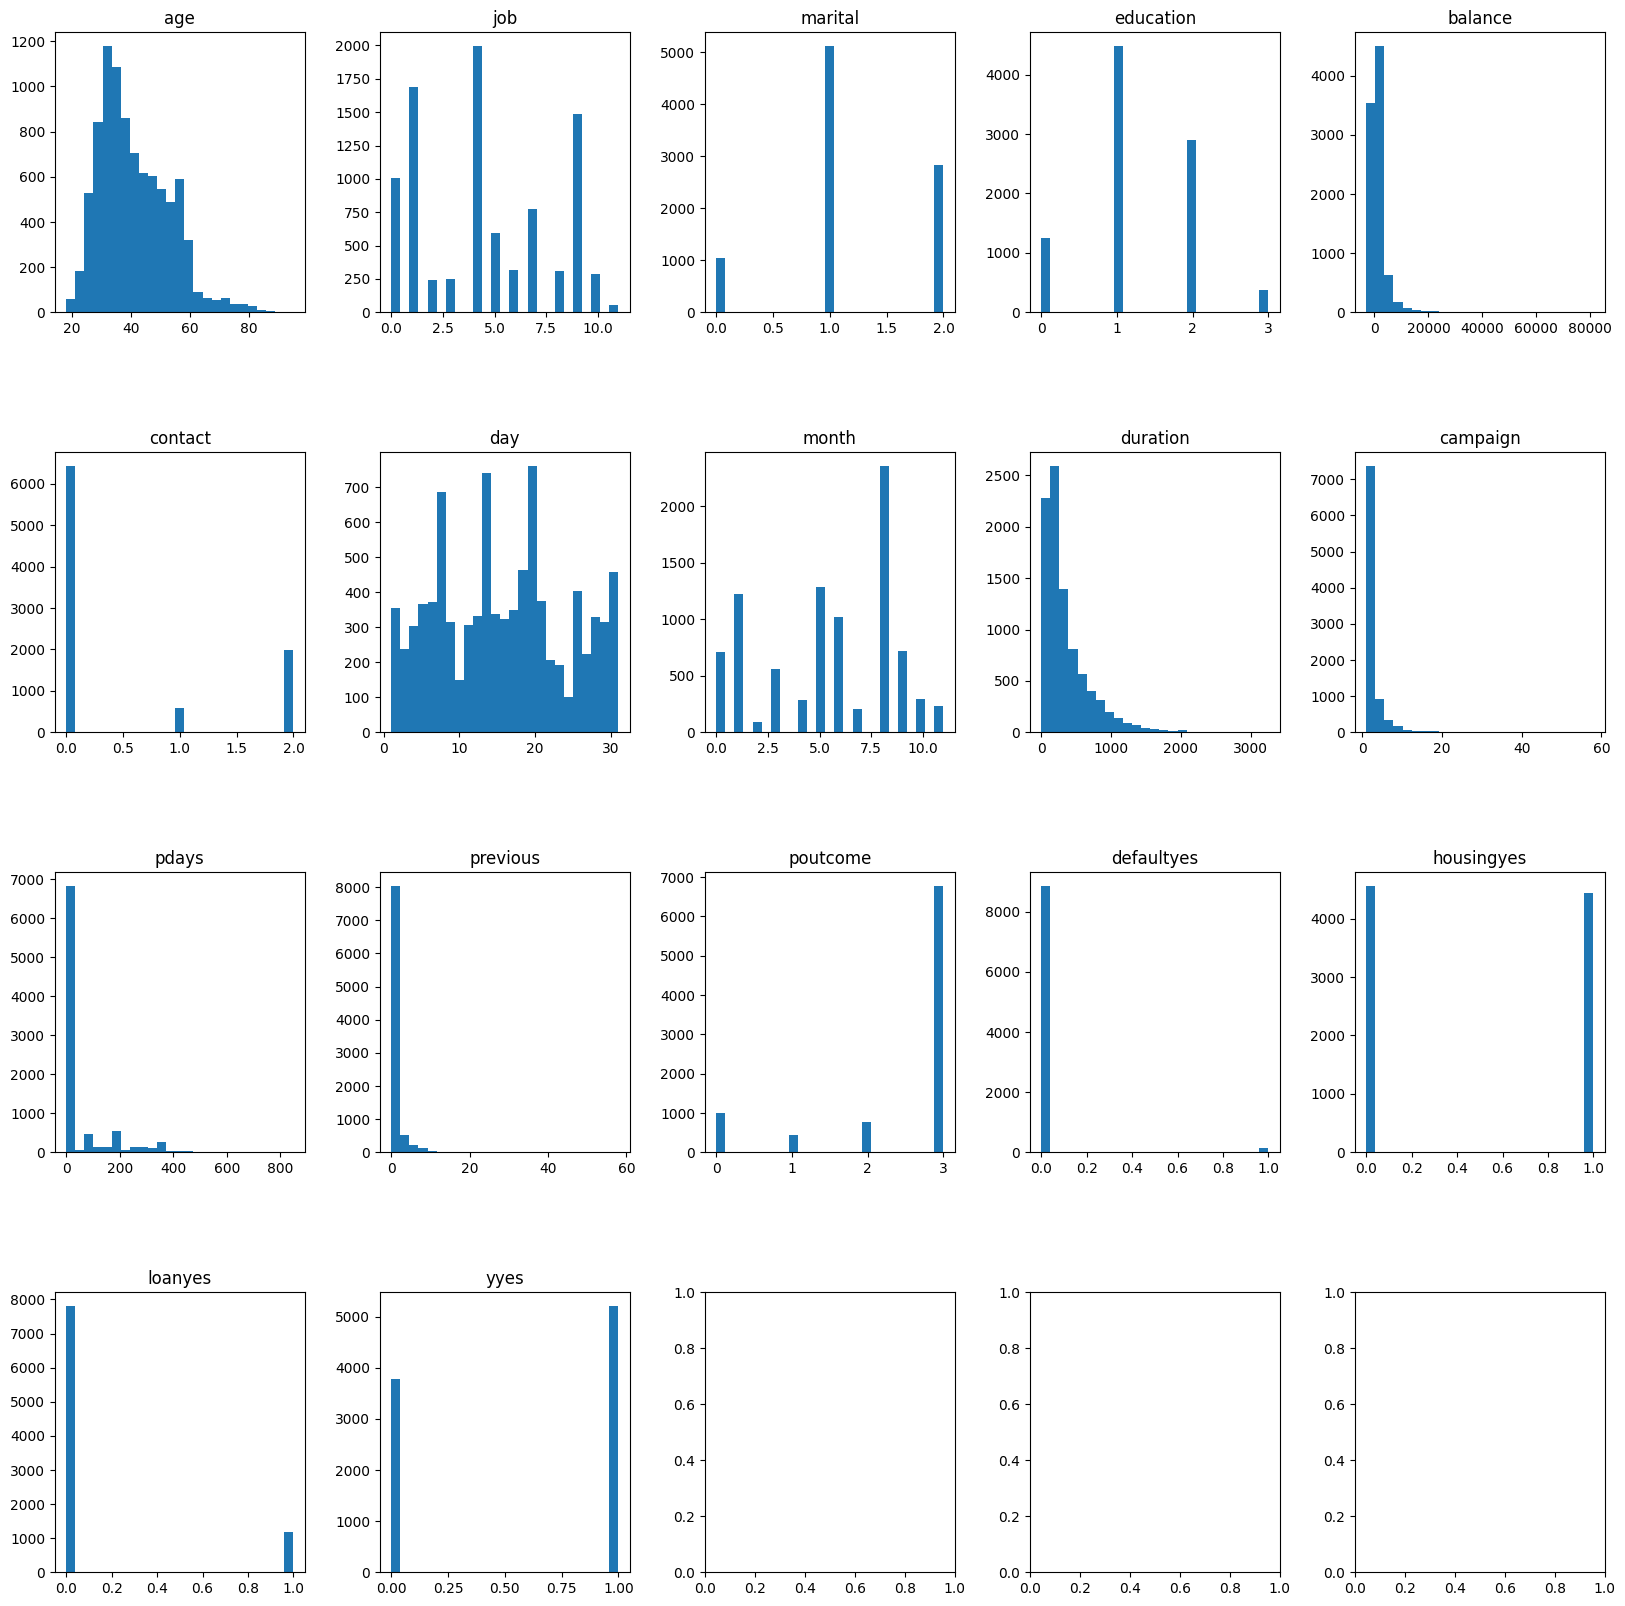

In [7]:
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
  if data[col].dtype == 'int64':
    tmp = np.array(data[col])
    axs[i,j].hist(tmp, bins=25)
    if j<4:
      j=j+1
    else:
      j=0
      i=i+1
    ax = plt.subplot(4,5,(i*5)+j)
    ax.set_title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [44]:
def calclog(col,offset):

  return np.log(col + offset)

data['age'] = calclog(data['age'],1)
data['duration'] = calclog(data['duration'],1)
data['campaign'] = calclog(data['campaign'],1)
offset = (data['balance'].min() * -1) + 1
print(offset)
data['balance'] = calclog(data['balance'],offset+1)

3059


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9000 non-null   float64
 1   job         9000 non-null   int64  
 2   marital     9000 non-null   int64  
 3   education   9000 non-null   int64  
 4   balance     9000 non-null   float64
 5   contact     9000 non-null   int64  
 6   day         9000 non-null   int64  
 7   month       9000 non-null   int64  
 8   duration    9000 non-null   float64
 9   campaign    9000 non-null   float64
 10  pdays       9000 non-null   int64  
 11  previous    9000 non-null   int64  
 12  poutcome    9000 non-null   int64  
 13  defaultyes  9000 non-null   int64  
 14  housingyes  9000 non-null   int64  
 15  loanyes     9000 non-null   int64  
 16  yyes        9000 non-null   int64  
dtypes: float64(4), int64(13)
memory usage: 1.2 MB


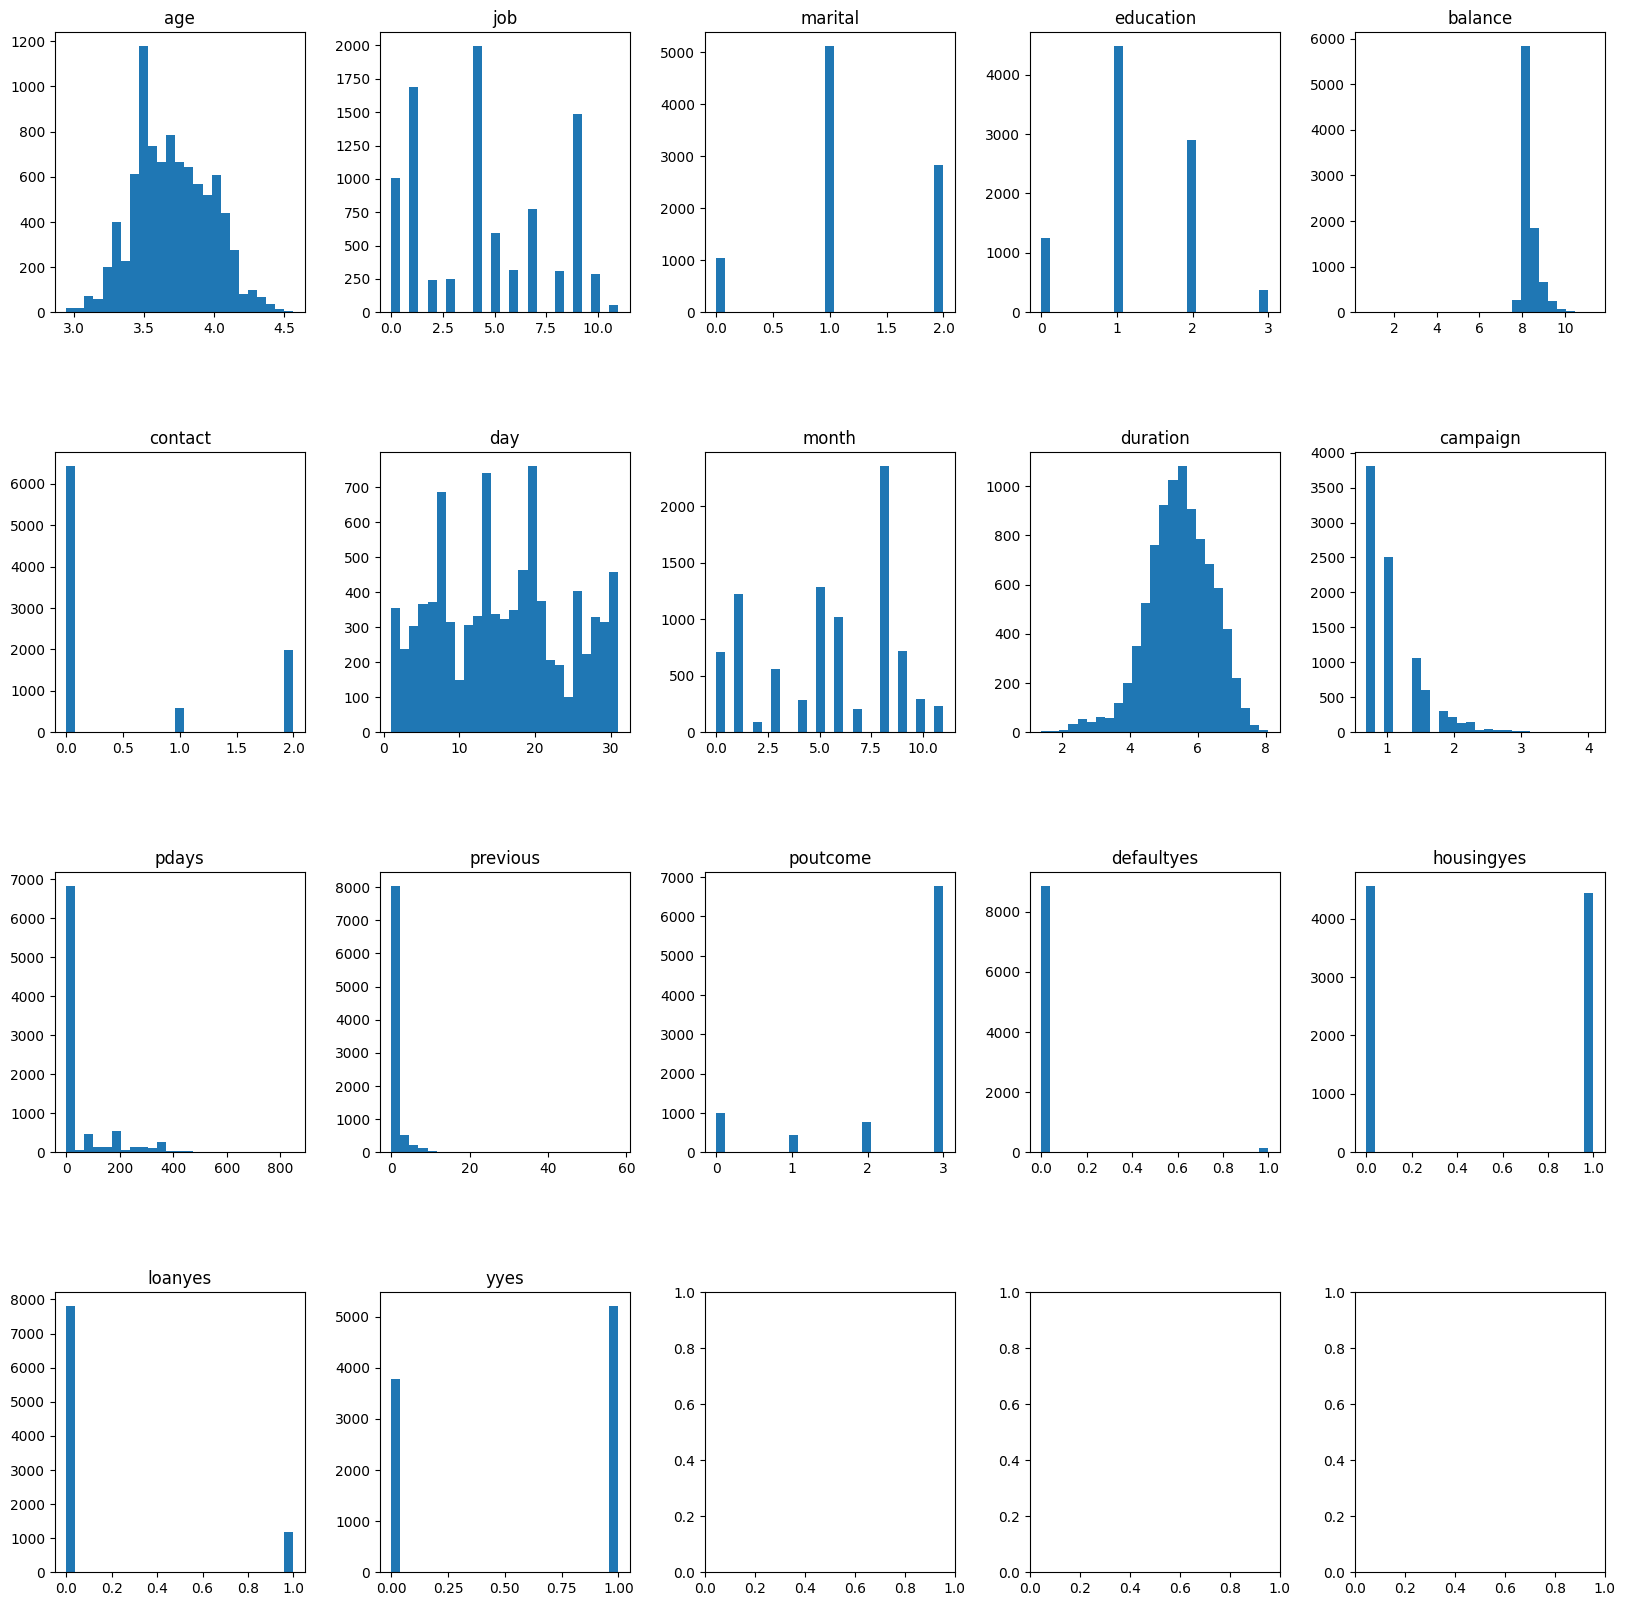

In [17]:
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
  tmp = np.array(data[col])
  axs[i,j].hist(tmp, bins=25)
  if j<4:
    j=j+1
  else:
    j=0
    i=i+1
  ax = plt.subplot(4,5,(i*5)+j)
  ax.set_title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

In [51]:
X = data[['age','job','marital','education','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','defaultyes','housingyes','loanyes']]
Y = data['yyes']
X = X.values
Y = Y.values

9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [52]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, test_size=.60)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50)

10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

Regresión Logística:
Exactitud (Accuracy) con el conjunto de validación : 0.8007407407407408


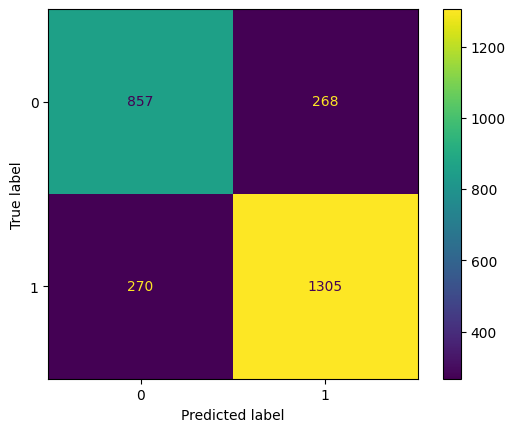

In [33]:
clf = LogisticRegression(C=1.0,solver="newton-cg")
modelo_RL = clf.fit(x_train, y_train)
print("Regresión Logística:\nExactitud (Accuracy) con el conjunto de validación :", modelo_RL.score(x_validation, y_validation))
pr = modelo_RL.predict(x_validation)
cm = confusion_matrix(y_validation, pr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_RL.classes_)
disp.plot()

Regresión Logística:
Exactitud (Accuracy) con el conjunto de validación : 0.7822222222222223


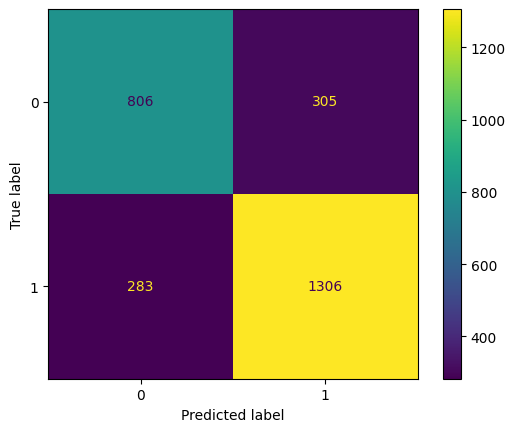

In [53]:
clf = LogisticRegression(C=3,solver="sag",max_iter=5000)
modelo_RL = clf.fit(x_train, y_train)
print("Regresión Logística:\nExactitud (Accuracy) con el conjunto de validación :", modelo_RL.score(x_validation, y_validation))
pr = modelo_RL.predict(x_validation)
cm = confusion_matrix(y_validation, pr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_RL.classes_)
disp.plot()

Regresión Logística:
Exactitud (Accuracy) con el conjunto de validación : 0.7977777777777778


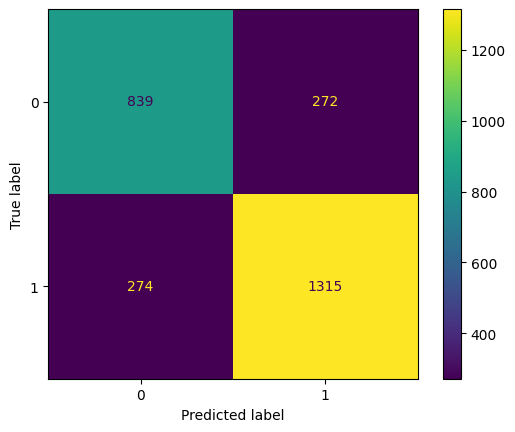

In [54]:
clf = LogisticRegression(C=3,solver="newton-cholesky",max_iter=5000)
modelo_RL = clf.fit(x_train, y_train)
print("Regresión Logística:\nExactitud (Accuracy) con el conjunto de validación :", modelo_RL.score(x_validation, y_validation))
pr = modelo_RL.predict(x_validation)
cm = confusion_matrix(y_validation, pr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_RL.classes_)
disp.plot()

11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

0.8022222222222222


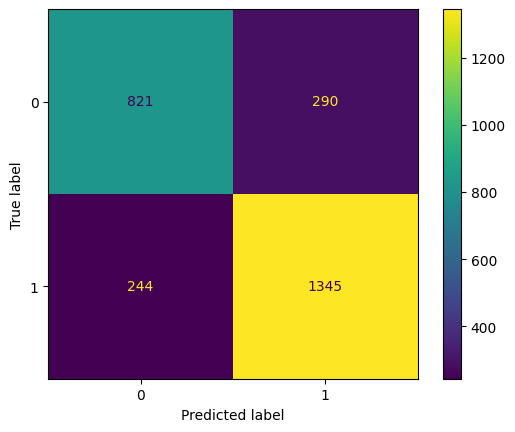

In [58]:
model = MLPClassifier(hidden_layer_sizes=(10),max_iter=1000,alpha=1.0,random_state=42)
model.fit(x_train, y_train)
print(model.score(x_validation, y_validation))
predictions = model.predict(x_validation)
cm = confusion_matrix(y_validation, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

0.8151851851851852


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


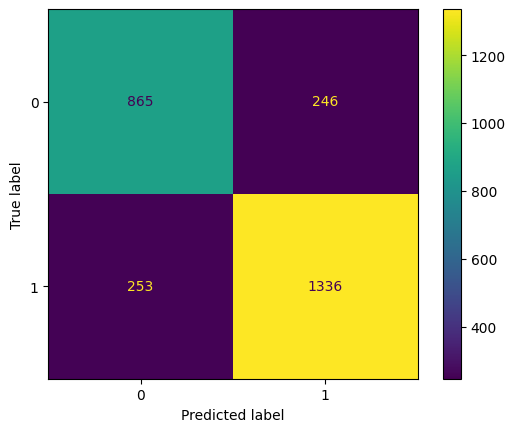

In [72]:
model = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(12),max_iter=3000,alpha=0.5,random_state=20)
model.fit(x_train, y_train)
print(model.score(x_validation, y_validation))
predictions = model.predict(x_validation)
cm = confusion_matrix(y_validation, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

0.82


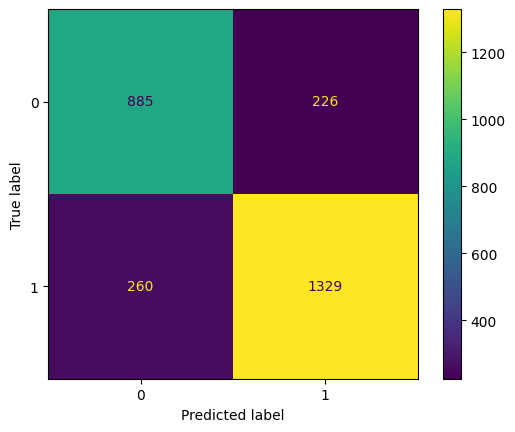

In [77]:
model = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(15),max_iter=5000,alpha=1.5,random_state=20)
model.fit(x_train, y_train)
print(model.score(x_validation, y_validation))
predictions = model.predict(x_validation)
cm = confusion_matrix(y_validation, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

0.8155555555555556


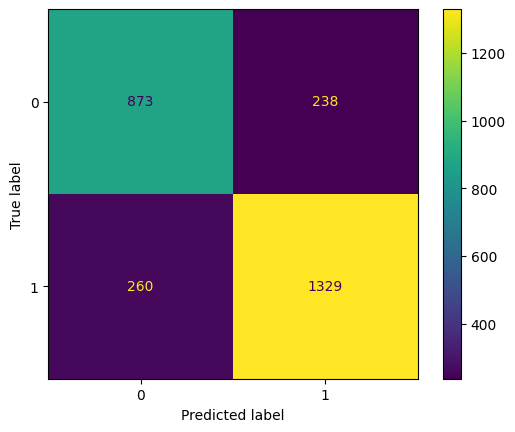

In [76]:
model = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8),max_iter=5000,alpha=1.5,random_state=20)
model.fit(x_train, y_train)
print(model.score(x_validation, y_validation))
predictions = model.predict(x_validation)
cm = confusion_matrix(y_validation, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

0.8092592592592592


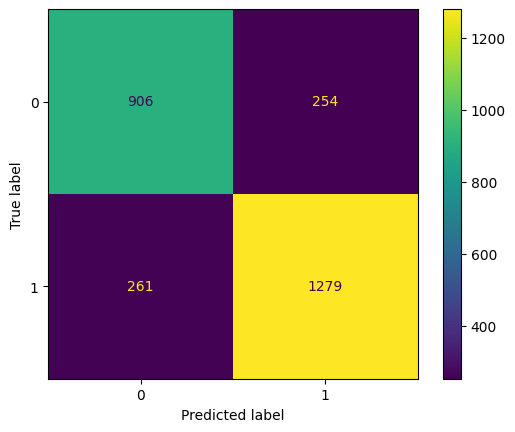

In [78]:
model = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(15),max_iter=5000,alpha=1.5,random_state=20)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

13.	Incluye tus conclusiones del problema,
**Para este ejercicio el porcentaje de Exactitud rondaba el 80% para ambas tecnicas: Regresión Logistica y Capas Neuronales. Esta ultima proporcionó valores ligeramente superiores por lo que sería el metodo seleccionado.
El resultado con el conjunto de prueba fue de 80.9% lo que indica la certeza con lo que se puede pronosticar el resultado de la campaña que oferta una línea de crédito con la institucion en cuestión**


13.a en particular ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

**Permiten efectuar un metodo rapido y confiable para establecer valores de prediccion que ayuden a estimar diversos comportamientos en el area de mercadotecnia.**
